# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"The total number of cities is {len(cities)}")

The total number of cities is 625


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set variables
c_data_list = []
set_no = 1
rec_no = 1
num_of_set = 50
units = "imperial"

print("Beginning Data Retrieval")
print("-----------------------------")

# Put city data into the list
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
    try:
        c_data_list.append({"City" : city,
                            "Lat" : response["coord"]["lat"],
                            "Lng" : response["coord"]["lon"],
                            "Max Temp" : response["main"]["temp_max"],
                            "Humidity" : response["main"]["humidity"],
                            "Cloudiness" : response["clouds"]["all"],
                            "Wind Speed" : response["wind"]["speed"],
                            "Country" : response["sys"]["country"],
                            "Date" : response["dt"]})
        print(f"Processing Record {rec_no} of Set {set_no} | {city}")
        if (len(c_data_list)) % num_of_set == 0:
            rec_no = 1
            set_no += 1
        
        else:
            rec_no += 1
        
    except KeyError:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hermanus
City not found. Skipping...
Processing Record 2 of Set 1 | yar-sale
Processing Record 3 of Set 1 | evansville
Processing Record 4 of Set 1 | fort saint james
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ust-kan
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | auki
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | zhangjiakou
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | bumba
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | west wendover
Processing Record 19 of Set 1 | port-gentil
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | new norfolk


City not found. Skipping...
Processing Record 36 of Set 4 | port moresby
Processing Record 37 of Set 4 | lasa
City not found. Skipping...
Processing Record 38 of Set 4 | xuddur
Processing Record 39 of Set 4 | shaunavon
Processing Record 40 of Set 4 | tombouctou
Processing Record 41 of Set 4 | dukat
Processing Record 42 of Set 4 | lavrentiya
City not found. Skipping...
Processing Record 43 of Set 4 | ilebo
Processing Record 44 of Set 4 | urucui
Processing Record 45 of Set 4 | wanaka
Processing Record 46 of Set 4 | port hardy
Processing Record 47 of Set 4 | naryan-mar
Processing Record 48 of Set 4 | erzurum
City not found. Skipping...
Processing Record 49 of Set 4 | union
City not found. Skipping...
Processing Record 50 of Set 4 | mabaruma
Processing Record 1 of Set 5 | torrington
Processing Record 2 of Set 5 | coruripe
Processing Record 3 of Set 5 | pacific grove
Processing Record 4 of Set 5 | djenne
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | half moon bay
City 

Processing Record 26 of Set 8 | nishihara
Processing Record 27 of Set 8 | husavik
Processing Record 28 of Set 8 | foz do iguacu
Processing Record 29 of Set 8 | soubre
Processing Record 30 of Set 8 | rio verde de mato grosso
Processing Record 31 of Set 8 | novobirilyussy
Processing Record 32 of Set 8 | tual
Processing Record 33 of Set 8 | sechura
Processing Record 34 of Set 8 | rafai
Processing Record 35 of Set 8 | kieta
Processing Record 36 of Set 8 | kodinsk
Processing Record 37 of Set 8 | vung tau
Processing Record 38 of Set 8 | bahia de caraquez
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | goderich
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | kawalu
Processing Record 43 of Set 8 | coari
Processing Record 44 of Set 8 | nuuk
Processing Record 45 of Set 8 | seymchan
Processing Record 46 of Set 8 | makakilo city
Processing Record 47 of Set 8 | kruisfontein
Processing Record 48 of Set 8 | abu samrah
Processing Record 49 of Set

Processing Record 15 of Set 12 | thaba nchu
City not found. Skipping...
Processing Record 16 of Set 12 | messina
Processing Record 17 of Set 12 | samarai
Processing Record 18 of Set 12 | jutai
Processing Record 19 of Set 12 | araouane
Processing Record 20 of Set 12 | tabou
Processing Record 21 of Set 12 | orange cove
Processing Record 22 of Set 12 | ubala
Processing Record 23 of Set 12 | viedma
Processing Record 24 of Set 12 | muhos
Processing Record 25 of Set 12 | bijie
Processing Record 26 of Set 12 | aguimes
Processing Record 27 of Set 12 | ushtobe
Processing Record 28 of Set 12 | mumford
Processing Record 29 of Set 12 | paamiut
Processing Record 30 of Set 12 | banamba
Processing Record 31 of Set 12 | henties bay
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe to store the city data
cities_df = pd.DataFrame(c_data_list)
cities_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Show five cities
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,53.01,90,17,1.99,ZA,1595126828
1,yar-sale,66.83,70.83,49.01,91,100,12.64,RU,1595126588
2,evansville,37.97,-87.56,84.20,70,1,6.93,US,1595126613
3,fort saint james,54.43,-124.25,60.55,81,74,4.72,CA,1595127017
4,ushuaia,-54.80,-68.30,32.00,94,75,9.17,AR,1595126619


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Describe the city data
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,19.581756,15.249948,69.617590,70.695353,45.500861,7.475800,1.595127e+09
std,33.084487,90.732088,13.312144,19.158462,38.521719,5.111438,1.432299e+02
min,-54.800000,-179.170000,24.800000,8.000000,0.000000,0.160000,1.595126e+09
25%,-7.710000,-69.260000,59.900000,60.000000,1.000000,3.740000,1.595127e+09
50%,21.200000,23.040000,71.080000,74.000000,40.000000,5.990000,1.595127e+09
75%,47.850000,97.520000,80.560000,85.000000,82.000000,10.250000,1.595127e+09
max,78.220000,179.320000,107.600000,100.000000,100.000000,33.910000,1.595127e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_idx = cities_df.loc[(cities_df.iloc[:, 4] > 100)].index
humidity_idx

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
filtered_df = cities_df.drop(index = humidity_idx)
filtered_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,53.01,90,17,1.99,ZA,1595126828
1,yar-sale,66.83,70.83,49.01,91,100,12.64,RU,1595126588
2,evansville,37.97,-87.56,84.20,70,1,6.93,US,1595126613
3,fort saint james,54.43,-124.25,60.55,81,74,4.72,CA,1595127017
4,ushuaia,-54.80,-68.30,32.00,94,75,9.17,AR,1595126619


In [9]:
# Extract relevant fields from the data frame
to_csv_df = cities_df.iloc[:, [0, 5, 7, 8, 4, 1, 2, 3, 6]]
to_csv_df.index.name = "City_ID"
# Export the City_Data into a csv

to_csv_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

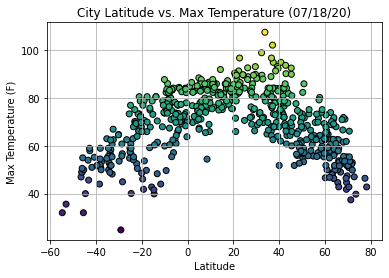

In [10]:
# Get data to make a scatter plot from the city data
latitude = cities_df.iloc[:, 1]
max_temp = cities_df.iloc[:, 3]

# Create a scatter plot - Latitude vs. Max Temperature
plt.scatter(latitude, max_temp, c = max_temp, cmap = "viridis", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({datetime.today().strftime('%m/%d/%y')})")
plt.savefig("../output_data/max_temp.png")
plt.show()

## Latitude vs. Humidity Plot

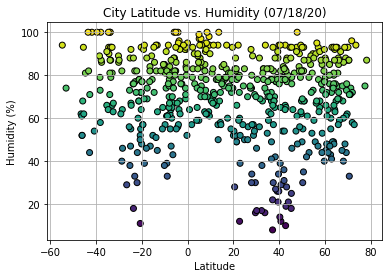

In [11]:
# Get humidity data from the city data
humidity = cities_df.iloc[:, 4]

# Create a scatter plot - Latitude vs. Humidity
plt.scatter(latitude, humidity, c = humidity, cmap = "viridis", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({datetime.today().strftime('%m/%d/%y')})")
plt.savefig("../output_data/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

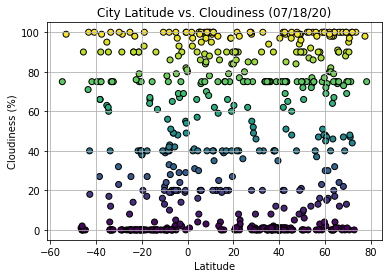

In [12]:
# Get cloudiness from the city data
cloudiness = cities_df.iloc[:, 5]

# Create a scatter plot - Latitude vs. Cloudiness
plt.scatter(latitude, cloudiness, c = cloudiness, cmap = "viridis", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({datetime.today().strftime('%m/%d/%y')})")
plt.savefig("../output_data/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

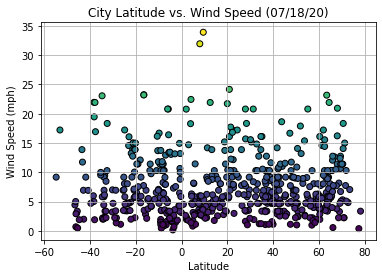

In [13]:
# Get wind speed from the city data
wind_speed = cities_df.iloc[:, 6]

# Create a scatter plot - Latitude vs. Cloudiness
plt.scatter(latitude, wind_speed, c = wind_speed, cmap = "viridis", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({datetime.today().strftime('%m/%d/%y')})")
plt.savefig("../output_data/wind_speed.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_r_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-squared is: {rvalue**2}")
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.plot(x_values, regress_values, "r-")
    
    return line_eq

In [15]:
# Create Northern and Southern Hemisphere DataFrames
north_df = cities_df.loc[cities_df.iloc[:, 1] >= 0]
south_df = cities_df.loc[cities_df.iloc[:, 1] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47007889389017865


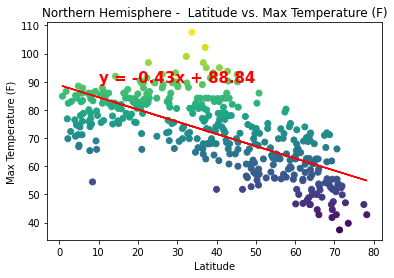

In [16]:
# Get latitude and max temperature data on Northern Hemisphere
north_lat = north_df.iloc[:, 1]
north_max_temp = north_df.iloc[:, 3]

# Create a scatter plot with a linear regression - Latitude vs. Max temperature
plt.scatter(north_lat, north_max_temp, c = north_max_temp, cmap = "viridis")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere -  Latitude vs. Max Temperature (F)")
plt.annotate(linear_r_plot(north_lat, north_max_temp), (10, 90), fontsize = 15, color = "red", weight = "bold")
plt.savefig("../output_data/northern_max_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46943417348125094


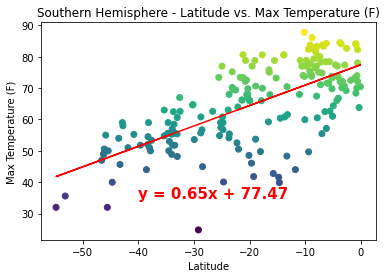

In [17]:
# Get latitude and max temperature data on Southern Hemisphere
south_lat = south_df.iloc[:, 1]
south_max_temp = south_df.iloc[:, 3]

# Create a scatter plot with a linear regression - Latitude vs. Max temperature
plt.scatter(south_lat, south_max_temp, c = south_max_temp, cmap = "viridis")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Latitude vs. Max Temperature (F)")
plt.annotate(linear_r_plot(south_lat, south_max_temp), (-40, 35), fontsize = 15, color = "red", weight = "bold")
plt.savefig("../output_data/southern_max_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003023514192657079


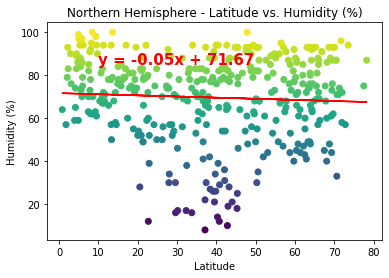

In [18]:
# Get humidity data on Northern Hemisphere
north_humidity = north_df.iloc[:, 4]

# Create a scatter plot with a linear regression - Latitude vs. Humidity
plt.scatter(north_lat, north_humidity, c = north_humidity, cmap = "viridis")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs. Humidity (%)")
plt.annotate(linear_r_plot(north_lat, north_humidity), (10, 85), fontsize = 15, color = "red", weight = "bold")
plt.savefig("../output_data/northern_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.4464026951950943e-05


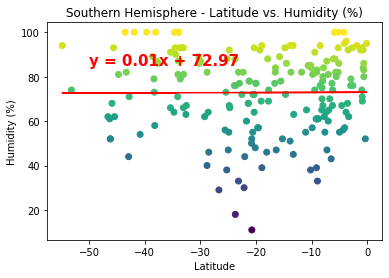

In [19]:
# Get humidity data on Southern Hemisphere
south_humidity = south_df.iloc[:, 4]

# Create a scatter plot with a linear regression - Latitude vs. Humidity
plt.scatter(south_lat, south_humidity, c = south_humidity, cmap = "viridis")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Latitude vs. Humidity (%)")
plt.annotate(linear_r_plot(south_lat, south_humidity), (-50, 85), fontsize = 15, color = "red", weight = "bold")
plt.savefig("../output_data/southern_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 9.300700810529933e-07


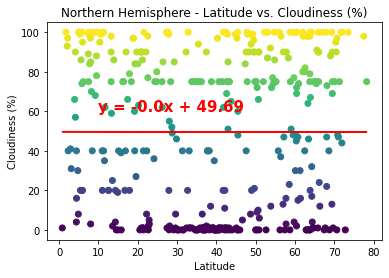

In [20]:
# Get cloudiness data on Northern Hemisphere
north_cloudiness = north_df.iloc[:, 5]

# Create a scatter plot with a linear regression - Latitude vs. Cloudiness
plt.scatter(north_lat, north_cloudiness, c = north_cloudiness, cmap = "viridis")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness (%)")
plt.annotate(linear_r_plot(north_lat, north_cloudiness), (10, 60), fontsize = 15, color = "red", weight = "bold")
plt.savefig("../output_data/northern_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020876397068019053


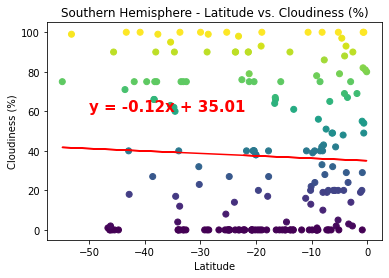

In [21]:
# Get cloudiness data on Southern Hemisphere
south_cloudiness = south_df.iloc[:, 5]

# Create a scatter plot with a linear regression - Latitude vs. Cloudiness
plt.scatter(south_lat, south_cloudiness, c = south_cloudiness, cmap = "viridis")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness (%)")
plt.annotate(linear_r_plot(south_lat, south_cloudiness), (-50, 60), fontsize = 15, color = "red", weight = "bold")
plt.savefig("../output_data/southern_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 7.587334531907874e-06


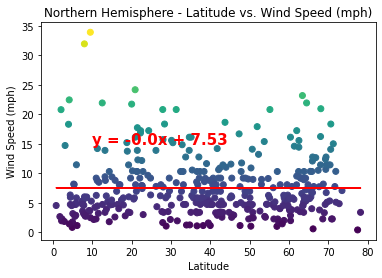

In [22]:
# Get wind speed data on Northern Hemisphere
north_wind_speed = north_df.iloc[:, 6]

# Create a scatter plot with a linear regression - Latitude vs. Cloudiness
plt.scatter(north_lat, north_wind_speed, c = north_wind_speed, cmap = "viridis")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed (mph)")
plt.annotate(linear_r_plot(north_lat, north_wind_speed), (10, 15), fontsize = 15, color = "red", weight = "bold")
plt.savefig("../output_data/northern_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002331632699647725


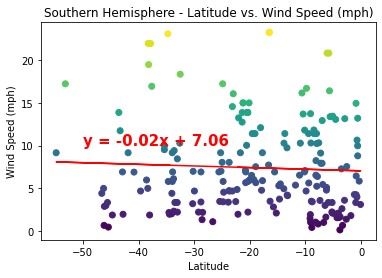

In [23]:
# Get wind speed data on Southern Hemisphere
south_wind_speed = south_df.iloc[:, 6]

# Create a scatter plot with a linear regression - Latitude vs. Cloudiness
plt.scatter(south_lat, south_wind_speed, c = south_wind_speed, cmap = "viridis")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed (mph)")
plt.annotate(linear_r_plot(south_lat, south_wind_speed), (-50, 10), fontsize = 15, color = "red", weight = "bold")
plt.savefig("../output_data/southern_wind_speed.png")
plt.show()

## Result

* The closer to the equator it is, the hotter weather it is.
    - The amount of sunshine received at the equator is more than other places.


* The higher latitude on the northern hemisphere and the lower latitude on the southern hemisphere it is, the colder temperature it is.
    - The reflection of the sun's rays and the amount of sunshine will affect the temperature.


* I wasn't able to find any correlation between latitude and wind speed, humidity, cloudiness.
    - I suppose wind speed, humidity and cloudiness would be affected by other factors such as precipitation or whether inland or waterfront.